# Final Project Intro to Data Science
---
**Dibuat Oleh**:
- Christopher Timothy Kwee / 23101910029
- Dennis Jonathan / 23101910027
- Gaizka Elbert / 23101910054
- Gilbert Aurelio Sachio / 23101910047
- Justin Jedidiah Sunarko / 23101910024

## 1. Prerequisites

### 1.1. Menginstall beberapa library

In [1]:
# # Menginstall package yang tidak ada
# !pip install xgboost
# !pip install statsmodels

### 1.2. Mengimpor library yang dibutuhkan

In [2]:
# Mengimpor library untuk manipulasi data dan aljabar linear
import pandas as pd
import numpy as np

import joblib
# import os
# os.makedirs('model_dumps')

# Mengimpor library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor fungsi-fungsi preprocessing dan model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Mengimpor fungsi-fungsi penguji model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Mengimpor fungsi-fungsi untuk pemodelan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm

# Menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 1.3. Mengimpor data

In [3]:
# Membaca data ke dalam environment
df = pd.read_csv('data/train.csv')

# Menunjukan lima data pertama
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Menunjukkan bentuk dari dataframe
df.shape

(1460, 81)

In [5]:
# Menunjukan kolom-kolom yang ada di dataframe
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. Eksplorasi Data

In [6]:
# Melihat persebaran dari data SalePrice yang merupakan data target
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

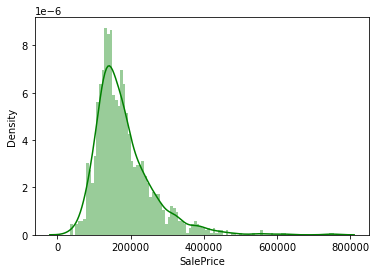

In [7]:
# Membuat distribusi plot pada kolom SalePrice
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [8]:
# Mencari jenis atau macam-macam tipe data pada dataset
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [9]:
# Membuang kolom Id karena tidak digunakan
df.drop(columns='Id',inplace=True)

In [10]:
# Split data df yang memiliki tipe data numerik
df_numerik = df.select_dtypes(exclude='object')
df_numerik.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

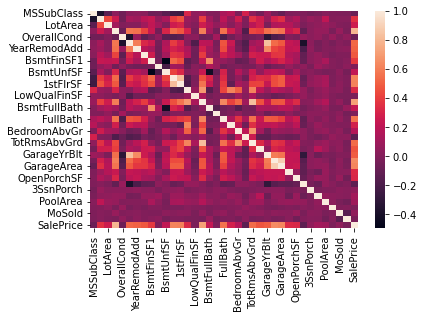

In [11]:
# Membuat heatmap dari df_numerik
sns.heatmap(df_numerik.corr())

<AxesSubplot:>

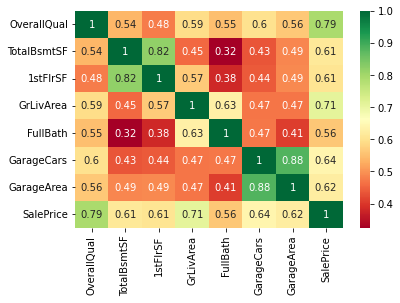

In [12]:
# Mencari nama kolom yang memiliki korelasi tinggi dengan target variable
high_col_num = df_numerik.corr().index[abs(df_numerik.corr()['SalePrice'])>0.55]

# Membuat heatmap dari high_col_num
sns.heatmap(df_numerik[high_col_num].corr(),annot=True,cmap="RdYlGn")

Disini dapat dilihat bahwa kolom-kolom yang memiliki korelasi tinggi dengan target variable `SalePrice` adalah kolom `OverallQuad`,`TotalBsmtSF`,`1stFlrSF`,`GrLivArea`,`FullBath`,`GarageCars`,dan `GarageArea`

In [13]:
# Membagi data yang memiliki tipe data object
df_cat = df.select_dtypes(include=['object'])

# Melihat 5 data teratas
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
# Menampilkan kolom-kolom dengan tipe kategorikal
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

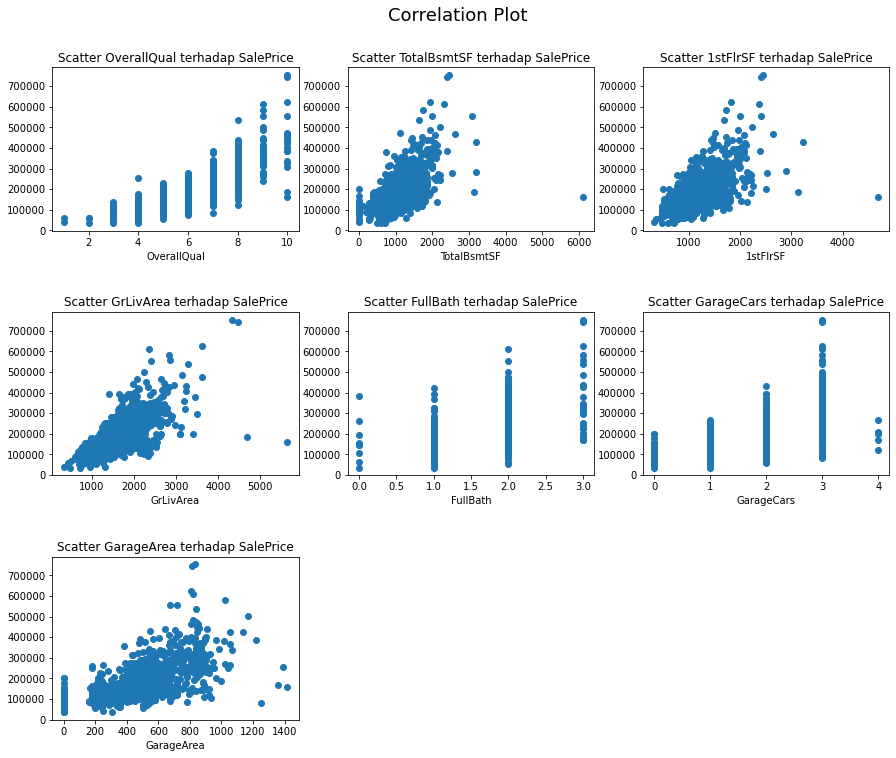

In [15]:
# Membuat bentuk dasar figure dan judul
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Correlation Plot", fontsize=18, y=0.95)

# Melakukan looping untuk plot data korelasi tinggi dengan target variable
for n, col in enumerate(high_col_num.drop('SalePrice')):
    # Mencari subplot dengan index n
    ax = plt.subplot(3, 3, n + 1)

    # Scatter data sesuai dengan kolom
    ax.scatter(col,'SalePrice',data=df_numerik)

    # Format nama figure
    ax.set_title('Scatter {} terhadap SalePrice'.format(col))
    ax.set_xlabel(col)

In [16]:
# Membersihkan data dengan melihat pada visualisasi data yang tidak berkelakuan baik pada regresi
df=df[(df['TotalBsmtSF']<=3000)]
df=df[(df['1stFlrSF']<=2800) & (df['SalePrice']<700000)]
df=df[(df['GrLivArea']<4000) & (df['SalePrice']<500000)]
df=df[(df['GarageArea']>100) & (df['GarageArea']<1100)&(df['SalePrice']<600000)]

In [17]:
# Menampilkan kolom-kolom yang memiliki nilai NaN
nan_cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# Melakukan pengisian nilai data yang kosong dengan none sesuai data description pada dataset
df[nan_cols] = df[nan_cols].fillna('none')

# Menampilkan lima baris pertama
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,250000


In [18]:
# Mencari jumlah nilai data NaN pada dataset
nan_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['NaN columns'])

# Menampilkan 5 data pertama
nan_df.head()

,NaN columns
LotFrontage,249
MasVnrType,8
MasVnrArea,8
Electrical,1
KitchenAbvGr,0


In [19]:
# Membuang kolom-kolom dengan nilai NaN melebihi 10% data yaitu sekitar 100 data
df.drop(nan_df[nan_df['NaN columns']>100].index,axis=1,inplace=True)

In [20]:
# Melakukan looping untuk menampilkan persentase unique dari data categorical 
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts()/len(df)*100)

RL         79.632353
RM         14.191176
FV          4.779412
RH          0.882353
C (all)     0.514706
Name: MSZoning, dtype: float64

Pave    99.705882
Grvl     0.294118
Name: Street, dtype: float64

none    93.970588
Grvl     3.161765
Pave     2.867647
Name: Alley, dtype: float64

Reg    62.867647
IR1    33.602941
IR2     2.867647
IR3     0.661765
Name: LotShape, dtype: float64

Lvl    90.441176
Bnk     3.823529
HLS     3.455882
Low     2.279412
Name: LandContour, dtype: float64

AllPub    99.926471
NoSeWa     0.073529
Name: Utilities, dtype: float64

Inside     71.838235
Corner     18.088235
CulDSac     6.544118
FR2         3.235294
FR3         0.294118
Name: LotConfig, dtype: float64

Gtl    94.779412
Mod     4.338235
Sev     0.882353
Name: LandSlope, dtype: float64

NAmes      16.102941
CollgCr    10.882353
OldTown     7.426471
Somerst     6.250000
Gilbert     5.808824
Edwards     5.588235
NWAmes      5.367647
Sawyer      5.220588
NridgHt     5.220588
SawyerW     4.264706
Crawfor     3.750000
BrkSide     3.529412
Mitchel     3.161765
Timber      2.720588
NoRidge     2.720588
IDOTRR      2.058824
ClearCr     1.985294
StoneBr     1.617647
SWISU       1.470588
Blmngtn     1.250000
BrDale      1.102941
MeadowV     0.882353
Veenker     0.808824
NPkVill     0.661765
Blueste     0.147059
Name: Neighborhood, dtype: float64

Norm      86.764706
Feedr      5.000000
Artery     3.235294
RRAn       1.838235
PosN       1.250000
RRAe       0.808824
PosA       0.588235
RRNn       0.367647
RRNe       0.147059
Name: Condition1, dtype: float64

Norm      99.117647
Feedr      0.367647
Artery     0.147059
RRNn       0.147059
PosA       0.073529
RRAn       0.073529
RRAe       0.073529
Name: Condition2, dtype: float64

1Fam      84.411765
TwnhsE     8.308824
Duplex     2.941176
Twnhs      2.794118
2fmCon     1.544118
Name: BldgType, dtype: float64

1Story    49.632353
2Story    31.176471
1.5Fin    10.147059
SLvl       4.779412
SFoyer     2.279412
1.5Unf     0.808824
2.5Unf     0.735294
2.5Fin     0.441176
Name: HouseStyle, dtype: float64

Gable      78.308824
Hip        19.485294
Flat        0.882353
Gambrel     0.735294
Mansard     0.441176
Shed        0.147059
Name: RoofStyle, dtype: float64

CompShg    98.382353
Tar&Grv     0.735294
WdShngl     0.367647
WdShake     0.294118
Metal       0.073529
Membran     0.073529
Roll        0.073529
Name: RoofMatl, dtype: float64

VinylSd    36.102941
HdBoard    15.661765
MetalSd    14.926471
Wd Sdng    13.676471
Plywood     7.720588
CemntBd     3.676471
BrkFace     3.529412
WdShing     1.617647
Stucco      1.617647
AsbShng     1.102941
BrkComm     0.147059
Stone       0.073529
ImStucc     0.073529
CBlock      0.073529
Name: Exterior1st, dtype: float64

VinylSd    35.294118
MetalSd    14.632353
HdBoard    14.558824
Wd Sdng    13.308824
Plywood     9.779412
CmentBd     3.676471
Wd Shng     2.352941
BrkFace     1.691176
Stucco      1.691176
AsbShng     1.176471
ImStucc     0.661765
Brk Cmn     0.514706
Stone       0.367647
AsphShn     0.147059
Other       0.073529
CBlock      0.073529
Name: Exterior2nd, dtype: float64

None       57.647059
BrkFace    31.838235
Stone       8.823529
BrkCmn      1.102941
Name: MasVnrType, dtype: float64

TA    61.176471
Gd    35.294118
Ex     3.088235
Fa     0.441176
Name: ExterQual, dtype: float64

TA    88.529412
Gd    10.000000
Fa     1.323529
Ex     0.147059
Name: ExterCond, dtype: float64

PConc     45.367647
CBlock    43.014706
BrkTil     9.485294
Slab       1.470588
Stone      0.441176
Wood       0.220588
Name: Foundation, dtype: float64

Gd      43.897059
TA      43.602941
Ex       7.941176
Fa       2.352941
none     2.205882
Name: BsmtQual, dtype: float64

TA      90.294118
Gd       4.632353
Fa       2.794118
none     2.205882
Po       0.073529
Name: BsmtCond, dtype: float64

No      65.514706
Av      15.294118
Gd       8.823529
Mn       8.088235
none     2.279412
Name: BsmtExposure, dtype: float64

GLQ     29.044118
Unf     28.897059
ALQ     15.220588
BLQ     10.294118
Rec      9.264706
LwQ      5.073529
none     2.205882
Name: BsmtFinType1, dtype: float64

Unf     86.029412
Rec      3.897059
LwQ      3.308824
BLQ      2.352941
none     2.205882
ALQ      1.323529
GLQ      0.882353
Name: BsmtFinType2, dtype: float64

GasA     98.088235
GasW      1.250000
Wall      0.294118
Grav      0.220588
OthW      0.073529
Floor     0.073529
Name: Heating, dtype: float64

Ex    51.691176
TA    28.970588
Gd    16.323529
Fa     2.941176
Po     0.073529
Name: HeatingQC, dtype: float64

Y    94.926471
N     5.073529
Name: CentralAir, dtype: float64

SBrkr    92.132353
FuseA     5.955882
FuseF     1.617647
FuseP     0.147059
Mix       0.073529
Name: Electrical, dtype: float64

TA    49.558824
Gd    42.426471
Ex     6.250000
Fa     1.764706
Name: KitchenQual, dtype: float64

Typ     93.308824
Min2     2.352941
Min1     2.279412
Mod      0.882353
Maj1     0.808824
Maj2     0.294118
Sev      0.073529
Name: Functional, dtype: float64

none    45.367647
Gd      26.691176
TA      22.573529
Fa       2.426471
Ex       1.617647
Po       1.323529
Name: FireplaceQu, dtype: float64

Attchd     63.014706
Detchd     28.382353
BuiltIn     6.176471
Basment     1.397059
CarPort     0.661765
2Types      0.367647
Name: GarageType, dtype: float64

Unf    44.485294
RFn    30.661765
Fin    24.852941
Name: GarageFinish, dtype: float64

TA    95.000000
Fa     3.529412
Gd     1.029412
Ex     0.220588
Po     0.220588
Name: GarageQual, dtype: float64

TA    96.102941
Fa     2.573529
Gd     0.661765
Po     0.514706
Ex     0.147059
Name: GarageCond, dtype: float64

Y    93.676471
N     4.264706
P     2.058824
Name: PavedDrive, dtype: float64

none    99.632353
Fa       0.147059
Gd       0.147059
Ex       0.073529
Name: PoolQC, dtype: float64

none     80.588235
MnPrv    10.661765
GdPrv     4.264706
GdWo      3.676471
MnWw      0.808824
Name: Fence, dtype: float64

none    96.323529
Shed     3.382353
Gar2     0.147059
Othr     0.073529
TenC     0.073529
Name: MiscFeature, dtype: float64

WD       87.205882
New       8.161765
COD       3.088235
ConLD     0.441176
ConLI     0.294118
CWD       0.294118
ConLw     0.294118
Con       0.147059
Oth       0.073529
Name: SaleType, dtype: float64

Normal     83.014706
Partial     8.382353
Abnorml     6.250000
Family      1.470588
Alloca      0.808824
AdjLand     0.073529
Name: SaleCondition, dtype: float64

In [21]:
# Melakukan looping pada setiap kolom dan membuang kolom yang memiliki unique bersifat jomplang/ekstrim
for col in df.select_dtypes(include='object').columns:
    if df[col].value_counts()[0]/len(df)>0.95:
        df.drop(columns=col,inplace=True)

In [22]:
# Membuang sisa baris yang masih menyisakan data yang kosong
df = df.dropna()

In [23]:
# Membagi data menjadi category
df_cat2 = df.select_dtypes(include=['object'])

# Membagi data menjadi numerical
df_num2 = df.select_dtypes(exclude=['object'])

In [24]:
# Membagi data categorical menjadi kolom-kolom baru menggunakan dummy variable berjumlah n-1
df1=pd.get_dummies(data=df_cat2,drop_first=True)

# Menampilkan 2 baris pertama
df1.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
# Menggabungkan data yang dipisahkan 
data=pd.concat([df1, df_num2], axis=1)

# Menampilkan 5 data pertama
data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,0,1,0,0,1,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,1,0,0,1,0,0,1,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,1,0,0,1,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,1,0,0,1,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,1,0,0,1,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# Membuat sebuah fungsi untuk mencari nilai VIF/Variance Inflation Function
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variable']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [27]:
# Menggunakan fungsi calc_vif untuk mengurutkan VIF dari nilai terbesar ke terkecil
vif = calc_vif(data.drop(columns='SalePrice')).sort_values('vif',ascending=False)

# Menampilkan 5 data pertama
vif

,variable,vif
192,BsmtFinSF1,inf
199,GrLivArea,inf
125,BsmtFinType1_none,inf
115,BsmtCond_none,inf
113,BsmtCond_Po,inf
...,...,...
180,SaleCondition_AdjLand,1.225402
173,SaleType_Con,1.209728
48,Condition1_RRNe,1.202849
14,LotConfig_FR3,1.192716


In [28]:
# Mencari nama kolom dengan vif yang lebih besar dari 5
highcor_col = vif[vif['vif']>=5]['variable'].tolist()

In [29]:
# Membuang data dengan kolom vif yang lebih besar dari 5
data_linear = data.drop(highcor_col,axis=1)

# Menampilkan 5 data pertama
data_linear.head()

,MSZoning_RH,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,BsmtFullBath,BsmtHalfBath,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,61,0,0,0,0,0,208500
1,0,0,0,0,1,0,0,0,1,0,...,0,1,298,0,0,0,0,0,0,181500
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,42,0,0,0,0,0,223500
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,35,272,0,0,0,0,140000
4,0,0,0,0,0,0,0,0,1,0,...,1,0,192,84,0,0,0,0,0,250000


## 3. Pemodelan

In [30]:
# Membuat fungsi untuk menunjukan rata-rata dan simpangan baku dari skor validasi silang
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### 3.1. Regresi Linear

Sebelum memulai regresi linear, data yang digunakan berasal dari data yang sudah tidak memiliki masalah multikolinearitas antar fitur yang telah dipilah di bab sebelumnya. Pertama-tama data akan dibagikan menjadi data *training* dan data *testing*. Jumlah data *testing* adalah $30\%$ dari data total.

In [31]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(data_linear.drop(columns='SalePrice'), 
                                                    data_linear['SalePrice'], 
                                                    test_size=0.3, random_state=101)

Pembagian data *training* dan *testing* dilanjutkan dengan pengskalaan data. Pengskalaan data dilakukan agar model tidak terlalu sensitif terhadap perubahan fitur input. Metode pengskalaan yang digunakan adalah metode *standard scaling* dengan menggunakan nilai Z-skor untuk masing-masing fitur.

In [32]:
# Melakukan fitting standard scaler ke data training
scaler_linear = StandardScaler().fit(X_train)

# Melakukan transformasi data training dan testing
X_train = pd.DataFrame(scaler_linear.transform(X_train), columns = X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler_linear.transform(X_test), columns = X_test.columns, index=X_test.index)

Pemodelan pertama yang dilakukan adalah regresi linear. Setelah melakukan fitting data *training*, kelompok melihat performa model dengan membandingkan koefisien determinasi atau nilai $R^2$ dari model.

In [33]:
# Membuat dan memfitting data training ke model regresi linear
LR = LinearRegression().fit(X_train, y_train)

# Membandingkan performa R-squared dari model
print('Linear Regression Train Score is : ' , LR.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LR.score(X_test, y_test))

Linear Regression Train Score is :  0.631597389039515
Linear Regression Test Score is :  -3.199331791653829e+23


Dapat dilihat dari hasil di atas, ada perbedaan signifikan dalam segi $R^2$ dimana model dapat menggambarkan data *training* dengan baik namun gagal dalam menggambarkan data *testing*. Kami menduga hal ini terjadi karena terdapat fitur yang tidak signifikan.

In [34]:
# Mendefinisikan variabel dependen dan independen
X = sm.add_constant(X_train)
y = y_train

# Menggunakan statsmodels untuk melihat hasil regresi
model_lr = sm.OLS(y, X).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     15.58
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.67e-130
Time:                        11:09:18   Log-Likelihood:                -11415.
No. Observations:                 945   AIC:                         2.302e+04
Df Residuals:                     850   BIC:                         2.348e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.817e+05   1462.091    124.265      0.000    1.79e+05    1.85e+05
MSZoning_RH            -270.0791   1569.698     -0.172      0.863   -3351.017    2810.858
Alley_Pave            -5162.4555   1558.269     -3.313      0.001   -8220.961   -2103.950
LotShape_IR2           1856.1562   1609.784      1.153      0.249   -1303.461    5015.773
LotShape_IR3           2009.5829   1609.084      1.249      0.212   -1148.661    5167.827
LotShape_Reg          -4209.9238   1718.791     -2.449      0.015   -7583.496    -836.352
LandContour_HLS        4510.6309   1710.986      2.636      0.009    1152.378    7868.884
LandContour_Low          46.1291   1879.753      0.025      0.980   -3643.373    3735.632
LotConfig_CulDSac      -498.7847   1647.083     -0.303      0.762   -3731.612    2734.043
LotConfig_FR2         -4458.2734   1558.369     -2.861      0.004   -7516.976   -1399.571
LotConfig_FR3         -1149.2966   1471.997     -0.781      0.435   -4038.471    1739.878
LandSlope_Mod           580.7041   1903.565      0.305      0.760   -3155.535    4316.943
LandSlope_Sev         -1340.5096   1775.805     -0.755      0.451   -4825.986    2144.967
Neighborhood_Blueste   -402.7148   1564.719     -0.257      0.797   -3473.882    2668.452
Neighborhood_BrDale   -7040.0509   1559.596     -4.514      0.000   -1.01e+04   -3978.939
Neighborhood_ClearCr   1562.5075   1693.194      0.923      0.356   -1760.824    4885.839
Neighborhood_MeadowV  -4919.7753   1514.213     -3.249      0.001   -7891.811   -1947.740
Neighborhood_NPkVill   1172.7280   1504.541      0.779      0.436   -1780.323    4125.779
Neighborhood_SWISU    -1780.9502   1604.560     -1.110      0.267   -4930.315    1368.415
Neighborhood_StoneBr   6202.6224   1532.998      4.046      0.000    3193.718    9211.527
Neighborhood_Timber    1371.3971   1570.901      0.873      0.383   -1711.903    4454.697
Neighborhood_Veenker   3962.9606   1572.301      2.520      0.012     876.914    7049.008
Condition1_Feedr      -4528.6457   1557.957     -2.907      0.004   -7586.539   -1470.752
Condition1_PosA         836.6356   1522.114      0.550      0.583   -2150.908    3824.179
Condition1_PosN         723.4056   1567.173      0.462      0.644   -2352.578    3799.389
Condition1_RRAe       -1889.5388   1669.331     -1.132      0.258   -5166.032    1386.954
Condition1_RRAn       -2493.7075   1531.988     -1.628      0.104   -5500.631     513.216
Condition1_RRNe       -2251.1682   1512.640     -1.488      0.137   -5220.115     717.778
Condition1_RRNn        1409.5942   1571.272      0.897      0.370   -1674.434    4493.622
HouseStyle_1.5Unf     -3475.1197   1683.819     -2.064      0.039   -6780.051    -170.189
HouseStyle_2.5Fin      4204.1739   1543.708      2.723      0.007    1174.248    7234.100
HouseStyle_2.5Unf      

Dalam proyek ini, kami menganggap fitur yang memiliki *p-value* dibawah tingkat signifikansi $\alpha=0.05$ adalah fitur-fitur yang signifikan secara linear, sehingga fitur yang memiliki *p-value* yang lebih besar dari $0.05$ merupakan fitur yang tidak signifikan.

In [35]:
# Mencari fitur-fitur yang signifikan
significants = model_lr.pvalues[(model_lr.pvalues < 0.05)].index.drop('const')
significants

Index(['Alley_Pave', 'LotShape_Reg', 'LandContour_HLS', 'LotConfig_FR2',
       'Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Gambrel', 'Foundation_Wood', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtFinType1_GLQ', 'BsmtFinType1_Rec',
       'BsmtFinType2_BLQ', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA',
       'Electrical_FuseF', 'FireplaceQu_Fa', 'MasVnrArea', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')

Setelah membuang fitur-fitur yang tidak signifikan terhadap model regresi linear, kami melakukan pemodelan kembali untuk melihat hasil dari regresi.

In [36]:
# Mendefinisikan variabel independen yang signifikan serta variabel dependen
X2 = sm.add_constant(X_train[significants])
y2 = y_train

# Menggunakan statsmodels untuk melihat hasil regresi
model_lr2 = sm.OLS(y2, X2).fit()
model_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     43.62
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          5.73e-157
Time:                        11:09:18   Log-Likelihood:                -11459.
No. Observations:                 945   AIC:                         2.298e+04
Df Residuals:                     913   BIC:                         2.314e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.817e+05   1477.951    122.932      0.000    1.79e+05    1.85e+05
Alley_Pave           -3924.3324   1515.770     -2.589      0.010   -6899.131    -949.534
LotShape_Reg         -5603.9508   1562.272     -3.587      0.000   -8670.013   -2537.889
LandContour_HLS       4792.9536   1538.628      3.115      0.002    1773.294    7812.613
LotConfig_FR2        -4448.1598   1518.382     -2.930      0.003   -7428.085   -1468.235
Neighborhood_BrDale  -6736.7217   1532.688     -4.395      0.000   -9744.722   -3728.722
Neighborhood_MeadowV -4502.4913   1513.721     -2.974      0.003   -7473.269   -1531.714
Neighborhood_StoneBr  6629.5324   1516.566      4.371      0.000    3653.171    9605.894
Neighborhood_Veenker  4258.5415   1544.836      2.757      0.006    1226.700    7290.384
Condition1_Feedr     -4731.5381   1506.836     -3.140      0.002   -7688.803   -1774.273
HouseStyle_1.5Unf    -3032.1982   1512.956     -2.004      0.045   -6001.473     -62.923
HouseStyle_2.5Fin     4163.4095   1499.786      2.776      0.006    1219.981    7106.838
HouseStyle_SFoyer    -4689.7797   1529.232     -3.067      0.002   -7690.998   -1688.562
HouseStyle_SLvl      -5136.6776   1560.267     -3.292      0.001   -8198.803   -2074.552
RoofStyle_Gambrel     4401.9134   1503.134      2.928      0.003    1451.914    7351.913
Foundation_Wood      -3194.7968   1540.178     -2.074      0.038   -6217.497    -172.097
BsmtExposure_Gd       9670.7969   1631.967      5.926      0.000    6467.954    1.29e+04
BsmtExposure_Mn       3113.0402   1508.420      2.064      0.039     152.667    6073.413
BsmtFinType1_GLQ      1.306e+04   1684.338      7.756      0.000    9758.909    1.64e+04
BsmtFinType1_Rec     -2891.2805   1552.025     -1.863      0.063   -5937.232     154.671
BsmtFinType2_BLQ     -2962.6336   1509.060     -1.963      0.050   -5924.262      -1.005
HeatingQC_Fa         -7479.0750   1556.254     -4.806      0.000   -1.05e+04   -4424.824
HeatingQC_Gd         -1.083e+04   1609.408     -6.729      0.000    -1.4e+04   -7670.414
HeatingQC_TA         -1.548e+04   1716.729     -9.016      0.000   -1.88e+04   -1.21e+04
Electrical_FuseF     -3117.4909   1517.748     -2.054      0.040   -6096.171    -138.811
FireplaceQu_Fa       -2818.7599   1497.001     -1.883      0.060   -5756.722     119.202
MasVnrArea            1.858e+04   1587.913     11.701      0.000    1.55e+04    2.17e+04
WoodDeckSF            1.139e+04   1586.740      7.176      0.000    8272.158    1.45e+04
OpenPorchSF           1.537e+04   1576.925      9.749      0.000    1.23e+04    1.85e+04
3SsnPorch             3862.9221   1540.570      2.507      0.012     839.452    6886.393
ScreenPorch           4342.4327   1545.830      2.809      0.005    1308.640    7376.225
PoolArea              3375.4292   1534.432      2.200    

In [37]:
# Membuat model regresi linear baru
LR3 = LinearRegression().fit(X_train[significants], y_train)

# Membandingkan performa R^2 model baru
print('Linear Regression Train Score is : ' , LR3.score(X_train[significants], y_train))
print('Linear Regression Test Score is : ' , LR3.score(X_test[significants], y_test))

Linear Regression Train Score is :  0.5969328394638045
Linear Regression Test Score is :  0.5596282034752587


Dapat dilihat bahwa model dengan fitur yang signifikan memiliki performa $R^2$ yang lebih baik untuk kedua dataset. Kita juga melakukan validasi silang untuk model tersebut dengan melakukan $5$-*Fold Cross Validation* untuk menghitung nilai $R^2$ dan *Root Mean Squared Error* (RMSE) dari model.

In [38]:
# Melakukan validasi silang
lin_scores = cross_validate(LinearRegression(), StandardScaler().fit_transform(data_linear[significants]), data_linear['SalePrice'],
                             scoring=["r2", 'neg_root_mean_squared_error'], cv=5,
                             n_jobs=-1)

In [39]:
# Memunculkan nilai R^2
display_scores(lin_scores['test_r2'])

Scores: [0.5451116  0.57286545 0.56615458 0.54563768 0.57618247]
Mean: 0.5611903546273765
Standard deviation: 0.013312602024963514


In [40]:
# Memunculkan nilai RMSE
display_scores(lin_scores['test_neg_root_mean_squared_error'] * -1)

Scores: [48285.8598722  49622.29665839 46760.28241726 42414.05496866
 44138.90754242]
Mean: 46244.28029178723
Standard deviation: 2643.8048486781936


### 3.2. Decision Tree
*Decision tree* dilatih menggunakan data yang sudah dibersihkan dengan dibatasi maksimal kedalaman pohon $4$ cabang. Model dibandingkan dengan menggunakan data *training* dan *testing*. Sebelum kami memulai melatih model tersebut, kami akan memisahkan *training* dan *testing* set dan melakukan pengskalaan variabel independen.

In [41]:
# Memisahkan data training dan testing
X1_train, X1_test, y1_train, y1_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'],
                                                    test_size=0.3, random_state=101)

# Melakukan standard scaling
scaler = StandardScaler().fit(X1_train)
X1_train = pd.DataFrame(scaler.transform(X1_train), columns = X1_train.columns, index=X1_train.index)
X1_test = pd.DataFrame(scaler.transform(X1_test), columns = X1_test.columns, index=X1_test.index)

In [42]:
# # Mendefinisikan dictionary untuk hyperparameter yang akan dicari
# hyperparameter = {
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4],
#     'max_depth':list(range(2, 100))
# }
#
# # Menggunakan random searching untuk mencari hyperparameter terbaik
# model_dtree = RandomizedSearchCV(DecisionTreeRegressor(random_state = 101),
#                                  hyperparameter,
#                                  scoring = 'r2',
#                                  cv = 5,
#                                  n_iter = 200,
#                                  random_state = 101,
#                                  verbose = 2,
#                                  n_jobs = -1)
#
# # Melakukan fitting terhadap data training
# model_dtree.fit(X1_train, y1_train)
#
# # Menyimpan model terbaik
# joblib.dump(model_dtree, 'model_dumps//model_dtree.sav')

In [43]:
# Meload model terbaik
model_dtree = joblib.load('model_dumps//model_dtree.sav')

# Menunjukan hyperparameter terbaik
print(model_dtree.best_params_)

# Membandingkan performa R-squared dari model
print('Decision Tree Train Score is : ' , model_dtree.score(X1_train, y1_train))
print('Decision Tree Test Score is : ' , model_dtree.score(X1_test, y1_test))

{'min_samples_split': 4, 'max_leaf_nodes': 91, 'max_depth': 7}
Decision Tree Train Score is :  0.9447332835385436
Decision Tree Test Score is :  0.7121873496304836


$5$-*Fold Cross validation* dilakukan untuk validasi hasil performa model. Perform model dilihat melalui koefisien determinasi dan RMSE.

In [44]:
# Melakukan validasi silang
dtree_scores = cross_validate(model_dtree.best_estimator_,
                             StandardScaler().fit_transform(data.drop(columns='SalePrice')), data['SalePrice'],
                             scoring=["r2", 'neg_root_mean_squared_error'], cv=5,
                             n_jobs=-1)

In [45]:
# Memunculkan nilai R^2
display_scores(dtree_scores['test_r2'])

Scores: [0.72730717 0.82121261 0.7920589  0.74561526 0.78341484]
Mean: 0.7739217544332723
Standard deviation: 0.033554958566518585


In [46]:
# Memunculkan nilai RMSE
display_scores(dtree_scores['test_neg_root_mean_squared_error'] * -1)

Scores: [37385.60375585 32104.28153661 32372.76455426 31736.14451168
 31553.42245594]
Mean: 33030.44336286767
Standard deviation: 2196.1119947762795


### 3.3. Random Forest

*Random Forest* merupakan hasil dari berbagai *decision tree*. Random forest memiliki performa yang lebih baik dari *decision tree* jika menggunakan data yang memiliki banyak variabel. `RandomForestRegressor` dipanggil dan melihat hasil koefisien determinasi menggunakan data *training* dan *testing.

In [47]:
# # Mendefinisikan dictionary untuk hyperparameter yang akan dicari
# hyperparameter = {
#     'n_estimators': np.linspace(100, 1000, 10, dtype=np.int64),
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4],
#     'max_depth':list(range(2, 100))
# }
#
# # Menggunakan random searching untuk mencari hyperparameter terbaik
# model_rf = RandomizedSearchCV(RandomForestRegressor(random_state = 101),
#                               hyperparameter,
#                               scoring = 'r2',
#                               cv = 5,
#                               n_iter = 200,
#                               random_state = 101,
#                               verbose = 2,
#                               n_jobs = -1)
#
# # Melakukan fitting terhadap data training
# model_rf.fit(X1_train, y1_train)
#
# # Menyimpan model terbaik
# joblib.dump(model_rf, 'model_dumps//model_rf.sav')

In [48]:
# Meload model terbaik
model_rf = joblib.load('model_dumps//model_rf.sav')

# Menunjukan hyperparameter terbaik
print(model_rf.best_params_)

# Membandingkan performa R-squared dari model
print('Random Forest Regressor Train Score is : ' , model_rf.score(X1_train, y1_train))
print('Random Forest Regressor Test Score is : ' , model_rf.score(X1_test, y1_test))

{'n_estimators': 700, 'min_samples_split': 2, 'max_leaf_nodes': 99, 'max_depth': 72}
Random Forest Regressor Train Score is :  0.9729731775253023
Random Forest Regressor Test Score is :  0.8710745252328319


Cross validation dilakukan untuk validasi hasil performa dari random forest. Hasil performa dilihat dengan menggunakan koefisien determinasi dan RMSE.

In [49]:
# Melakukan validasi silang
rf_scores = cross_validate(model_rf.best_estimator_,
                           StandardScaler().fit_transform(data.drop(columns='SalePrice')), data['SalePrice'],
                           scoring=["r2", 'neg_root_mean_squared_error'], cv=5,
                           n_jobs=-1)

In [50]:
# Memunculkan nilai R^2
display_scores(rf_scores['test_r2'])

Scores: [0.84384503 0.90854819 0.86188457 0.89429498 0.87096465]
Mean: 0.8759074848518683
Standard deviation: 0.023032975920753963


In [51]:
# Memunculkan nilai RMSE
display_scores(rf_scores['test_neg_root_mean_squared_error'] * -1)

Scores: [28290.81373003 22960.99314328 26383.39751815 20457.68297878
 24354.90634456]
Mean: 24489.55874295846
Standard deviation: 2707.280222726571


### 3.4. Gradient Boosting Model
*Gradient Boosting* adalah model ensamble yang merupakan serangkaian *decision tree* yang dilatih untuk menutupi kekurangan model-model lainnya.

In [52]:
# # Mendefinisikan dictionary untuk hyperparameter yang akan dicari
# hyperparameter = {
#     'n_estimators': np.linspace(100, 1000, 10, dtype=np.int64),
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4],
#     'max_depth':list(range(2, 100)),
#     'learning_rate':np.linspace(0.1, 1, 10)
# }
#
# # Menggunakan random searching untuk mencari hyperparameter terbaik
# model_gbr = RandomizedSearchCV(GradientBoostingRegressor(random_state = 101),
#                                hyperparameter,
#                                scoring = 'r2',
#                                cv = 5,
#                                n_iter = 200,
#                                random_state = 101,
#                                verbose = 2,
#                                n_jobs = -1)
#
# # Melakukan fitting terhadap data training
# model_gbr.fit(X1_train, y1_train)
#
# # Menyimpan model terbaik
# joblib.dump(model_gbr, 'model_dumps//model_gbr.sav')

In [53]:
# Meload model terbaik
model_gbr = joblib.load('model_dumps//model_gbr.sav')

# Menunjukan hyperparameter terbaik
print(model_gbr.best_params_)

# Membandingkan performa R-squared dari model
print('GBRModel Train Score is : ' , model_gbr.score(X1_train, y1_train))
print('GBRModel Test Score is : ' , model_gbr.score(X1_test, y1_test))

{'n_estimators': 800, 'min_samples_split': 3, 'max_leaf_nodes': 2, 'max_depth': 41, 'learning_rate': 0.30000000000000004}
GBRModel Train Score is :  0.96564235970932
GBRModel Test Score is :  0.8905804535639479


Sama layaknya regresi linear, kami juga menggunakan $5$-*Fold Cross Validation* untuk menguji performa dari model yang dimiliki, baik untuk $R^2$ maupun juga RMSE.

In [54]:
# Melakukan validasi silang
gbrm_scores = cross_validate(model_gbr.best_estimator_,
                             StandardScaler().fit_transform(data.drop(columns='SalePrice')), data['SalePrice'],
                             scoring=["r2", 'neg_root_mean_squared_error'], cv=5,
                             n_jobs=-1)

In [55]:
# Memunculkan skor R^2
display_scores(gbrm_scores['test_r2'])

Scores: [0.88940785 0.92399522 0.90037811 0.92396196 0.88845346]
Mean: 0.9052393198118576
Standard deviation: 0.015864129142491308


In [56]:
# Memunculkan skor RMSE
display_scores(gbrm_scores['test_neg_root_mean_squared_error'] * -1)

Scores: [23808.37116308 20932.20358182 22407.17020721 17350.98379657
 22644.36649866]
Mean: 21428.619049467554
Standard deviation: 2234.8316233189103


### 3.5. XGB Reg Model

XGBoost merupakan gabungan dari algoritma *sparsity-aware* untuk data yang kosong dan *weighted quantile* untuk aproksimasi *learning tree*. XGBoost cocok untuk variabel independen yang memiliki kontribusi berbeda terhadap variabel independen dan mengisi data yang kosong seperti data ini.

Hasil dari XGBoost dibandingkan dengan menggunakan data *training* dan *testing*. Performa XGB dibandingkan menggunakan koefisien determinasi.

In [57]:
# # Mendefinisikan dictionary untuk hyperparameter yang akan dicari
# hyperparameter = {
#     'n_estimators': np.linspace(100, 1000, 10, dtype=np.int64),
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4],
#     'max_depth':list(range(2, 100)),
#     'learning_rate':np.linspace(0.1, 1, 10)
# }
#
# # Menggunakan random searching untuk mencari hyperparameter terbaik
# model_xgb = RandomizedSearchCV(XGBRegressor(random_state = 101),
#                                hyperparameter,
#                                scoring = 'r2',
#                                cv = 5,
#                                n_iter = 200,
#                                random_state = 101,
#                                verbose = 2,
#                                n_jobs = -1)
#
# # Melakukan fitting terhadap data training
# model_xgb.fit(X1_train, y1_train)
#
# # Menyimpan model terbaik
# joblib.dump(model_xgb, 'model_dumps//model_xgb.sav')

In [58]:
# Meload model terbaik
model_xgb = joblib.load('model_dumps//model_xgb.sav')

# Menunjukan hyperparameter terbaik
print(model_xgb.best_params_)

# Membandingkan performa R-squared dari model
print('XGB REG Train Score is : ' , model_xgb.score(X1_train, y1_train))
print('XGB REG Forest Test Score is : ' , model_xgb.score(X1_test, y1_test))

{'n_estimators': 800, 'min_samples_split': 2, 'max_leaf_nodes': 78, 'max_depth': 2, 'learning_rate': 0.2}
XGB REG Train Score is :  0.9955371414080815
XGB REG Forest Test Score is :  0.8901344624554324


Agar hasil model sesuai, maka dilakukan $5$-*Fold Cross Validation* agar mendapatkan performa model yang sesuai dengan *training* set.

In [59]:
# Melakukan validasi silang
xgb_scores = cross_validate(model_xgb.best_estimator_,
                            StandardScaler().fit_transform(data.drop(columns='SalePrice')), data['SalePrice'],
                            scoring=["r2","neg_root_mean_squared_error"], cv=5,
                            n_jobs=-1)

Performa model dilihat melalui nilai koefesien determinasi.

In [60]:
# Memunculkan nilai R^2
display_scores(xgb_scores['test_r2'])

Scores: [0.8977199  0.92069961 0.90307806 0.92538381 0.87957725]
Mean: 0.9052917275305086
Standard deviation: 0.016520060768627807


Performa model juga dilihat melalui nilai root mean square.

In [61]:
# Memunculkan nilai RMSE
display_scores(xgb_scores['test_neg_root_mean_squared_error'] * -1)

Scores: [22896.1840169  21381.20435659 22101.44512316 17187.99270466
 23528.07461105]
Mean: 21418.980162471766
Standard deviation: 2236.0165886130367


## 4. Kesimpulan

Setelah semua permodelan dibuat, maka kami membandingkan semua hasil permodelan berdasarkan koefisien determinasi dan root mean square. Tabel diurutkan dari yang paling besar untuk menunjukkan model yang terbaik. Hasil menunjukkan bahwa XGB Regressor model memiliki performa terbaik setelah dilakukan cross validation dengan nilai koefisien determinasi $0.91$ dan RMSE $21,419$.

In [62]:
index = ['Linear Regression','Gradient Boosting Model','Decision Tree','Random Forest','XGB Reg Model']

val = [lin_scores['test_r2'].mean(),
       gbrm_scores['test_r2'].mean(),
       dtree_scores['test_r2'].mean(),
       rf_scores['test_r2'].mean(),
       xgb_scores['test_r2'].mean()]

RMSE = [lin_scores['test_neg_root_mean_squared_error'].mean() * -1,
        gbrm_scores['test_neg_root_mean_squared_error'].mean() * -1,
        dtree_scores['test_neg_root_mean_squared_error'].mean() * -1,
        rf_scores['test_neg_root_mean_squared_error'].mean() * -1,
        xgb_scores['test_neg_root_mean_squared_error'].mean() * -1]

summary = pd.DataFrame({'Mean_R2':val,'Mean_RMSE':RMSE},index=index).sort_values('Mean_R2',ascending=False)
summary

,Mean_R2,Mean_RMSE
XGB Reg Model,0.905292,21418.980162
Gradient Boosting Model,0.905239,21428.619049
Random Forest,0.875907,24489.558743
Decision Tree,0.773922,33030.443363
Linear Regression,0.561190,46244.280292
